In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

I = cv2.imread('xray.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = cv2.resize(I, (128, 128))

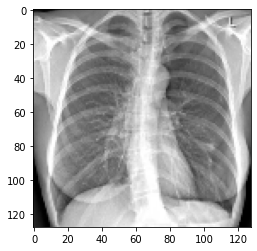

In [80]:
plt.imshow(I, cmap='gray')

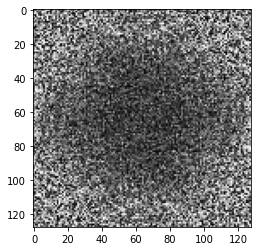

In [87]:
f = np.fft.fft2(I)
f_mag = (np.abs(f))
plt.imshow(np.uint8(f_mag / np.mean(f_mag) * 255), cmap='gray')

In [84]:
np.max(f_mag)

2547874.0

In [7]:
def global_enhancement(I):
    return(np.tanh(I/16) * max(np.max(I), np.abs(np.min(I))))

In [88]:
def up_sample_blur(I):
    I_e = cv2.pyrUp(I)

    return(I_e)
    
def down_sample(I):
    I_d = cv2.pyrDown(I)

    return(I_d)

def image_pyramid(I, n_levels):
    lst = list()
    
    I = np.float32(I)
    
    for i in range(0, n_levels):
        I_d = down_sample(I)
        D = I - up_sample_blur(I_d)
        lst.append(D)
        
        I = I_d
        
    lst.append(I)
    
    return(lst)

def image_pyramid_rec(lst, n_levels):
    
    I = lst[n_levels]
    
    for i in range(n_levels, 0, -1):
        I = up_sample_blur(I) + lst[i-1]
        
    return(I)

In [89]:
prm = image_pyramid(I, 3)

In [94]:
prm[3].shape

(16, 16)

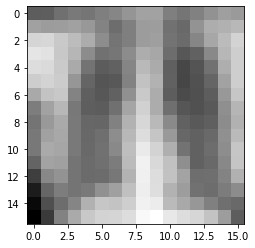

In [98]:
plt.imshow(((prm[3])), cmap='gray')

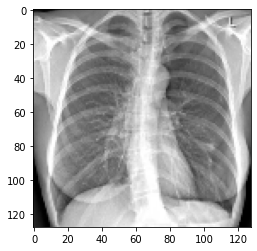

In [104]:
I = prm[3]

for i in range(3, 0, -1):
    I = up_sample_blur(I) + prm[i-1]

plt.imshow(I, cmap='gray')

In [99]:
I_e = image_pyramid_rec(prm, 3)

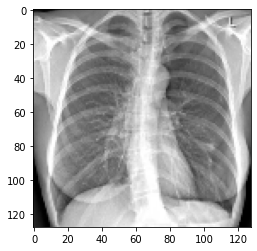

In [100]:
plt.imshow(np.uint8(I_e), cmap='gray')

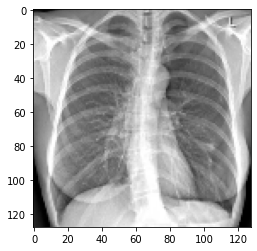

In [16]:
plt.imshow(np.uint8(I), cmap='gray')

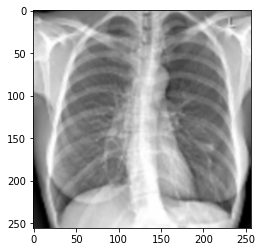

In [105]:
J = cv2.pyrUp(I)
plt.imshow(np.uint8(J), cmap='gray')

In [106]:
for i in range(3):
    prm[i] = global_enhancement(prm[i])

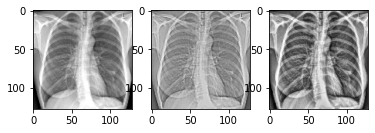

In [107]:
I_e = image_pyramid_rec(prm, 3)
plt.subplot(131)
plt.imshow(I, cmap='gray')
plt.subplot(132)
plt.imshow(((np.float32(I) - cv2.GaussianBlur(np.float32(I), [5, 5], 3, 3))*2 + I), cmap='gray')
plt.subplot(133)
plt.imshow(I_e, cmap='gray')


#plt.subplot(121)
#plt.imshow((I_e), cmap='gray')
#plt.subplot(122)
#plt.imshow(((np.float32(I) - cv2.GaussianBlur(np.float32(I), [11, 11], 3, 3))*0.5 + I), cmap='gray')